geochecking Debby's station, with fixed lats, lons

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [3]:
whos

Interactive namespace is empty.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from oct2py import octave
import seawater as sw
from __future__ import print_function
from numpy import *
from scipy import *
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
from matplotlib import reload
plt.style.use('seaborn')
import netCDF4 as nc
import numpy as np
import cmocean
import Ddp_withdat as Ddp
""
from salishsea_tools import (
    nc_tools,
    viz_tools,
    geo_tools,
    tidetools
)

%matplotlib inline

/home/tjarniko/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [5]:
reload(Ddp)

/home/tjarniko/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


<module 'Ddp_withdat' from '/data/tjarniko/MEOPAR/at3/notebooks/carbon_dev/APRIL_EXP/Ddp_withdat.py'>

In [6]:
#============================================================================#
#                              LOAD DATA                                     #
#============================================================================#
infil = np.loadtxt('../DATASETS/2016_05.txt')

crid = infil[:,0]
ln = infil[:,2]
stn = infil[:,3]
lat = infil[:,6]
lon = infil[:,7]
P = infil[:,8]
T = infil[:,9]
S = infil[:,10]
ox = infil[:,11]
ox_qf = infil[:,12]
dic = infil[:,13]
alk = infil[:,15]
dic_qf = infil[:,14]
alk_qf = infil[:,16]
no3 = infil[:,17]
no3_qf = infil[:,18]
si = infil[:,19]
si_qf = infil[:,20]
po4 = infil[:,21]
po4_qf = infil[:,22]
pH_obs = infil[:,23]
pH_obs_qf = infil[:,24]

In [7]:
st_42 = (stn == 42)
st_12 = (stn == 12)
st_27 = (stn == 27)

### stn 42
    423, 263
    Stn 42, real-life lon, lat:
    -123.44, 49.03
    Closest model point lon, lat:
    -123.439, 49.0321
    Distance between them
    0.259142955895
    
###  stn 12
    647, 168
    Stn 12, real-life lon, lat:
    -124.68, 49.73
    Closest model point lon, lat:
    -124.68, 49.7304
    Distance between them
    0.052274032372

### stn 27
    505, 246
    Stn 27, real-life lon, lat:
    -123.8, 49.32
    Closest model point lon, lat:
    -123.801, 49.3217
    Distance between them
    0.215374933011


In [8]:
mesh = nc.Dataset('/data/tjarniko/MEOPAR/grid/bathymetry_201702.nc')

nav_lon = mesh.variables['nav_lon'][:]
nav_lat = mesh.variables['nav_lat'][:]
bathy = mesh.variables['Bathymetry'][:]
    

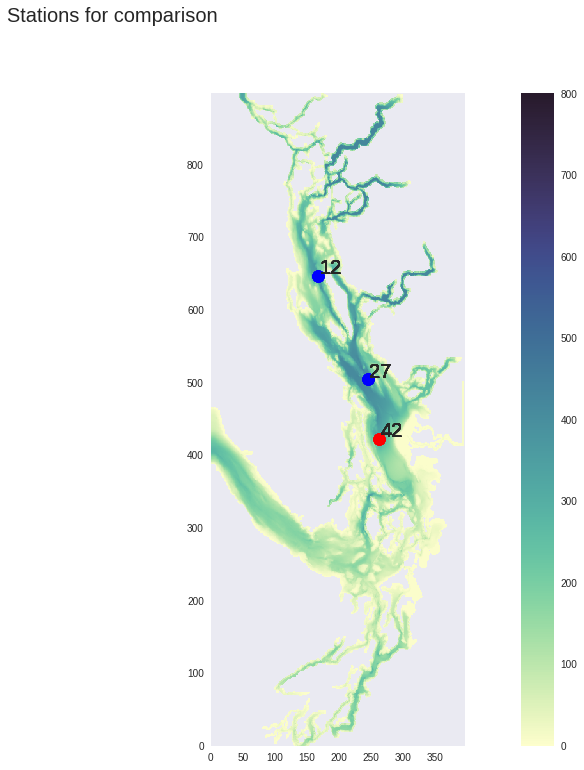

In [9]:
pts_all = len(dic)

fig, ax = plt.subplots(1, 1, figsize=(20, 12))
viz_tools.set_aspect(ax)
mesh = ax.pcolormesh(bathy, cmap=cmocean.cm.deep, vmin = 0, vmax = 800)
for w in range(0,pts_all):
    if (stn[w] == 12):
        j, i = geo_tools.find_closest_model_point(lon[w],lat[w],nav_lon,nav_lat)
        ax.plot(i,j,'b.',markersize=24)
        ax.text(i+2,j+2,'12',fontsize = 20)
    if (stn[w] == 27):
        j, i = geo_tools.find_closest_model_point(lon[w],lat[w],nav_lon,nav_lat)
        ax.plot(i,j,'b.',markersize=24)
        ax.text(i+2,j+2,'27',fontsize = 20)
    if (stn[w] == 42):
        j, i = geo_tools.find_closest_model_point(lon[w],lat[w],nav_lon,nav_lat)
        ax.plot(i,j,'r.',markersize=24)
        ax.text(i+2,j+2,'42',fontsize = 20)
fig.colorbar(mesh)
plt.suptitle('Stations for comparison',fontsize=20)



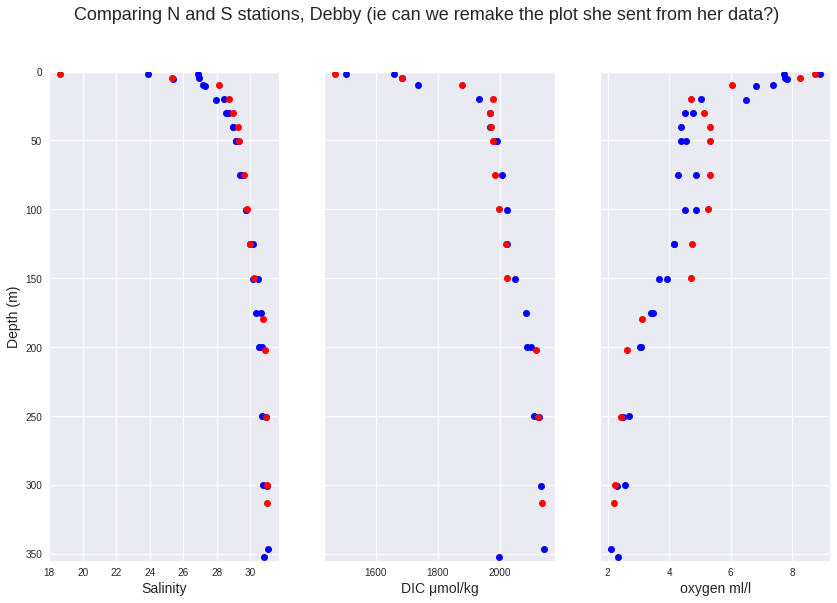

In [10]:
dend = 30
# Three-panel plot
fig, (ax2, ax3, ax4) = plt.subplots(figsize=(14.0, 9.0) , nrows=1, ncols=3, sharey=True)
# Temperature
ax2.plot(S[st_27],P[st_27],'ob')
ax2.plot(S[st_12],P[st_12],'ob')
ax2.plot(S[st_42],P[st_42],'or')
ax2.set_ylabel('Depth (m)', fontsize = 14)
ax2.set_ylim([0,355])
ax2.set_ylim(ax2.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax2.set_xlabel('Salinity', fontsize = 14)
#ax2.xaxis.set_label_position('top') # this moves the label to the top
#ax2.xaxis.set_ticks_position('top') # this moves the ticks to the top
# Salinity
ax3.plot(dic[st_27],P[st_27],'ob')
ax3.plot(dic[st_12],P[st_12],'ob')
ax3.plot(dic[st_42],P[st_42],'or')
ax3.set_xlabel('DIC μmol/kg', fontsize = 14)
#ax3.xaxis.set_label_position('top') # this moves the label to the top
#ax3.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax3.yaxis.set_visible(True) # This erases the y ticks
# Fluorescence
ax4.plot(ox[st_27],P[st_27],'ob')
ax4.plot(ox[st_12],P[st_12],'ob')
ax4.plot(ox[st_42],P[st_42],'or')
ax4.set_xlabel('oxygen ml/l', fontsize = 14)
#ax4.xaxis.set_label_position('top') # this moves the label to the top
#ax4.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax4.yaxis.set_visible(True) # This erases the y ticks

fig.suptitle('Comparing N and S stations, Debby (ie can we remake the plot she sent from her data?)', fontsize = 18)

plt.show()

<img src="./APRIL_PROFILES/fig_prof3_april-1.png" alt="Drawing" style="width: 700px;">

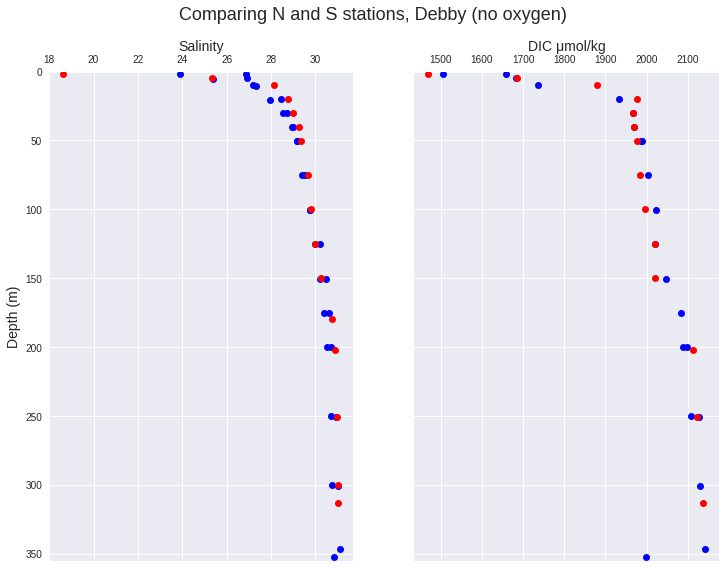

In [11]:
dend = 30
# Three-panel plot
fig, (ax2, ax3) = plt.subplots(figsize=(12.0, 9.0) , nrows=1, ncols=2, sharey=True)
# Temperature
ax2.plot(S[st_27],P[st_27],'ob')
ax2.plot(S[st_12],P[st_12],'ob')
ax2.plot(S[st_42],P[st_42],'or')
ax2.set_ylabel('Depth (m)', fontsize = 14)
ax2.set_ylim([0,355])
ax2.set_ylim(ax2.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax2.set_xlabel('Salinity', fontsize = 14)
ax2.xaxis.set_label_position('top') # this moves the label to the top
ax2.xaxis.set_ticks_position('top') # this moves the ticks to the top
# Salinity
ax3.plot(dic[st_27],P[st_27],'ob')
ax3.plot(dic[st_12],P[st_12],'ob')
ax3.plot(dic[st_42],P[st_42],'or')
ax3.set_xlabel('DIC μmol/kg', fontsize = 14)
ax3.xaxis.set_label_position('top') # this moves the label to the top
ax3.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax3.yaxis.set_visible(True) # This erases the y ticks

fig.suptitle('Comparing N and S stations, Debby (no oxygen)', fontsize = 18)



#total_fig = dirstr+figtit+ '.png'
#fig.savefig(total_fig)
#plt.close(fig)
plt.show()

In [12]:
from IPython.display import HTML
HTML("""
<video width="960" height="720" controls>
  <source src="./STN3MOV/movie_DP_day_.mp4" type="video/mp4">
</video>
""")

In [13]:
HTML("""
<video width="960" height="720" controls>
  <source src="./STN3MOV/movie_dic_n_zl_22.mp4" type="video/mp4">
</video>
""")

In [14]:
HTML("""
<video width="960" height="720" controls>
  <source src="./STN3MOV/movie_dic_ra_zl_22.mp4" type="video/mp4">
</video>
""")

In [15]:
HTML("""
<video width="960" height="720" controls>
  <source src="./STN3MOV/movie_dic_zl_22_3s_.mp4" type="video/mp4">
</video>
""")

In [16]:
HTML("""
<video width="960" height="720" controls>
  <source src="./STN3MOV/movie_yvel_zl_22_.mp4" type="video/mp4">
</video>
""")